# House Price Prediction 

Here we are predicting house prices based on our model . 
In which we use **Data Exploration, Data Preprocessing, Linear Regression, Feature Scaling, Engineered Factors, Random Forest Regression** like concepts.



## Important Libraries
In this project , we predict house prices using data analysis and machine learning with libraries like pandas, NumPy, Matplotlib, Seaborn, and Scikit-learn.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Data Analysis


In [2]:
data=pd.read_csv("housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In above cell , index 4 - total_bedrooms has 20433 entires 
there is 207 missing values in the total_bedrooms.
so to avoid getting a ValueError , we use dropna function.
in this we remove 207 rows in our dataset .

In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In our model , we can not do something with string value so we change "ocean_proximity" column into 3 columns in the *binary form* because it has three categories , and it is called *one-hot encode*.

In [7]:
# One-hot encode BEFORE train-test split to keep structure consistent
data = data.join(pd.get_dummies(data['ocean_proximity'], dtype=int))

In [8]:
from sklearn.model_selection import train_test_split
X = data.drop(['median_house_value'],axis=1)   #drop the 'median_house_value' column from the whole table
y = data['median_house_value']                 #only 'median_house_value' column

We split our data into two dataset, called trainig set and test set.
first dataset train the model , and as the name second one evaluate it 

In [9]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [10]:
train_data=X_train.join(y_train)

In [11]:
train_data


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value
16873,-122.41,37.60,26.0,2754.0,402.0,1128.0,395.0,6.3719,NEAR OCEAN,0,0,0,0,1,466900.0
10259,-117.85,33.86,18.0,329.0,72.0,209.0,71.0,4.6806,<1H OCEAN,1,0,0,0,0,187500.0
15729,-122.44,37.78,16.0,883.0,236.0,601.0,219.0,2.1510,NEAR BAY,0,0,0,1,0,146900.0
3174,-119.78,36.37,41.0,831.0,149.0,443.0,146.0,3.1406,INLAND,0,1,0,0,0,100000.0
7253,-118.14,34.01,36.0,702.0,210.0,834.0,216.0,2.2500,<1H OCEAN,1,0,0,0,0,162500.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15374,-117.25,33.39,22.0,2699.0,543.0,1425.0,491.0,2.3750,<1H OCEAN,1,0,0,0,0,137300.0
8477,-118.31,33.92,35.0,1307.0,246.0,672.0,219.0,4.8456,<1H OCEAN,1,0,0,0,0,146400.0
16931,-122.31,37.57,42.0,3157.0,676.0,1603.0,629.0,3.7422,NEAR OCEAN,0,0,0,0,1,292600.0
9502,-123.54,39.17,18.0,2251.0,510.0,1032.0,369.0,2.2946,<1H OCEAN,1,0,0,0,0,101000.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>,
        <Axes: title={'center': 'NEAR BAY'}>],
       [<Axes: title={'center': 'NEAR OCEAN'}>,
        <Axes: title={'center': 'median_house_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

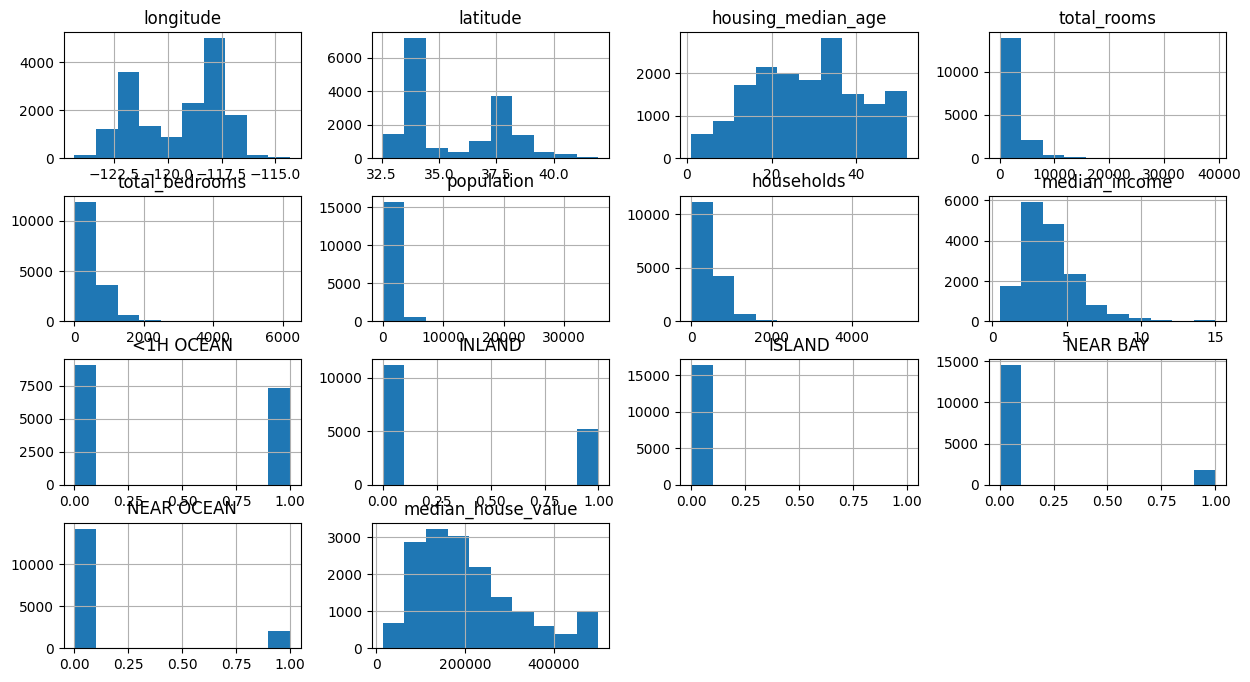

In [12]:
train_data.hist(figsize=(15,8))

first we have to remove Ocean_proximity column because it has string datatype 
we will draw a heatmap to see correlation between the features 
  - Whether they increase/decrease together, and
  - How strongly they do so.

**Correlation_Value_Meaning**
 -   +1.0	            Perfect positive correlation
- +0.7 to +1.0	        Strong positive correlation
- +0.3 to +0.7	        Moderate positive correlation
-  0	                       No correlation
- -0.3 to -0.7	        Moderate negative correlation
 - -0.7 to -1.0	         Strong negative correlation
   -1.0              	Perfect negative correlation

<Axes: >

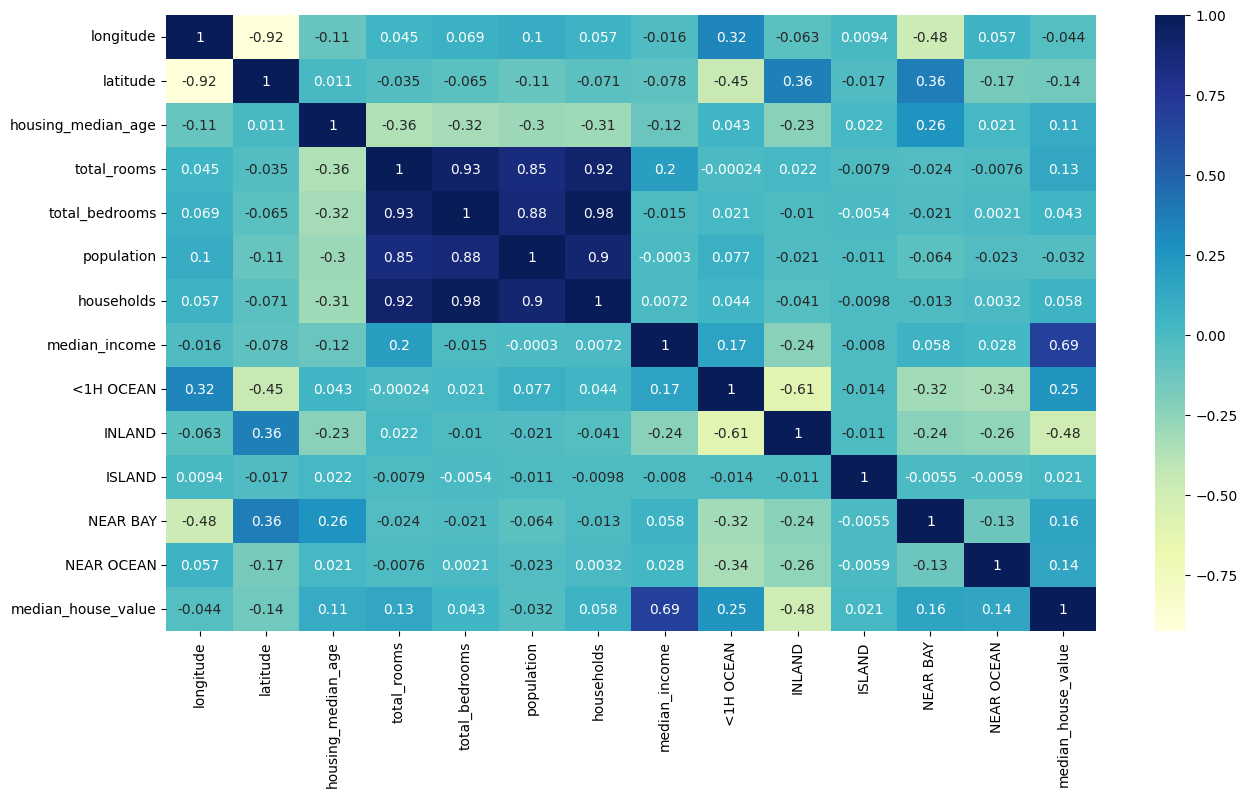

In [13]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.drop('ocean_proximity',axis=1).corr(), annot=True, cmap="YlGnBu")     #correlation

### 2. Data PreProcessing and feature scaling

In [14]:
#Pre-processing
#above hist diagram is skewed (right skewed)
#we will take log of the data
train_data['total_rooms']=np.log(train_data['total_rooms']+1)
train_data['total_bedrooms']=np.log(train_data['total_bedrooms']+1)
train_data['population']=np.log(train_data['population']+1)
train_data['households']=np.log(train_data['households']+1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>,
        <Axes: title={'center': 'total_rooms'}>],
       [<Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>,
        <Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>],
       [<Axes: title={'center': '<1H OCEAN'}>,
        <Axes: title={'center': 'INLAND'}>,
        <Axes: title={'center': 'ISLAND'}>,
        <Axes: title={'center': 'NEAR BAY'}>],
       [<Axes: title={'center': 'NEAR OCEAN'}>,
        <Axes: title={'center': 'median_house_value'}>, <Axes: >,
        <Axes: >]], dtype=object)

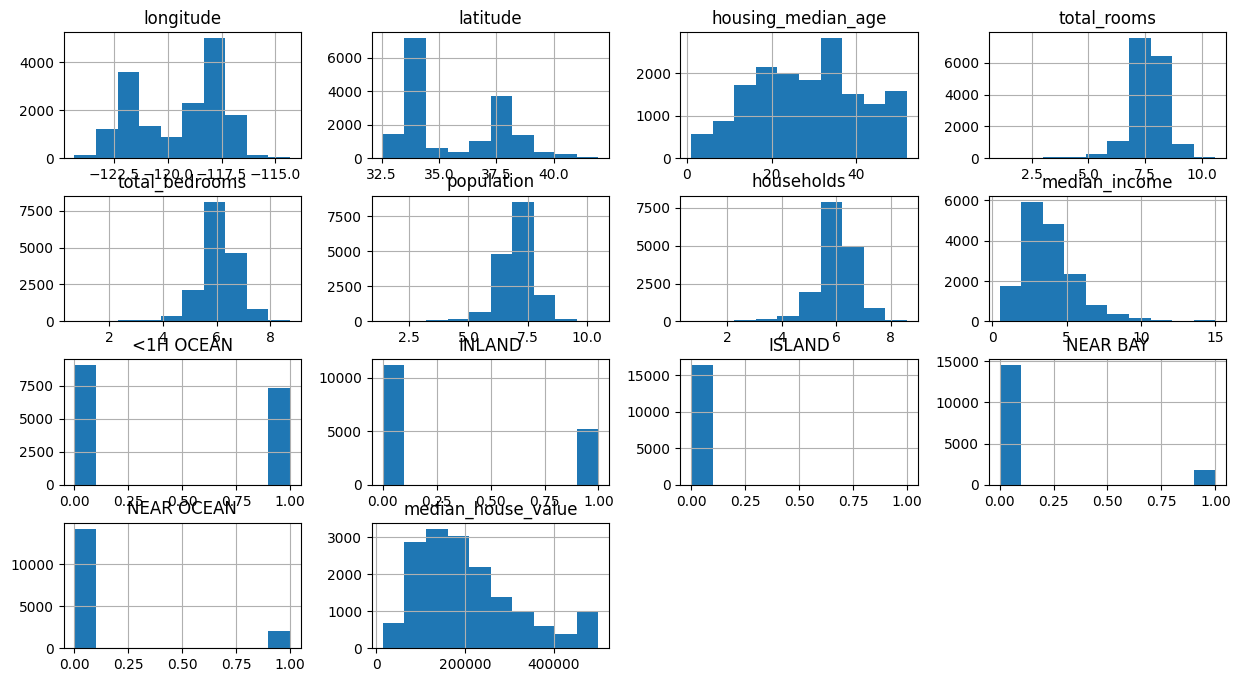

In [15]:
train_data.hist(figsize=(15,8))

#train_data.ocean_proximity.value_counts()
#pd.get_dummies(train_data.ocean_proximity)
train_data=train_data.join(pd.get_dummies(train_data.ocean_proximity).astype(int))

<Axes: xlabel='latitude', ylabel='longitude'>

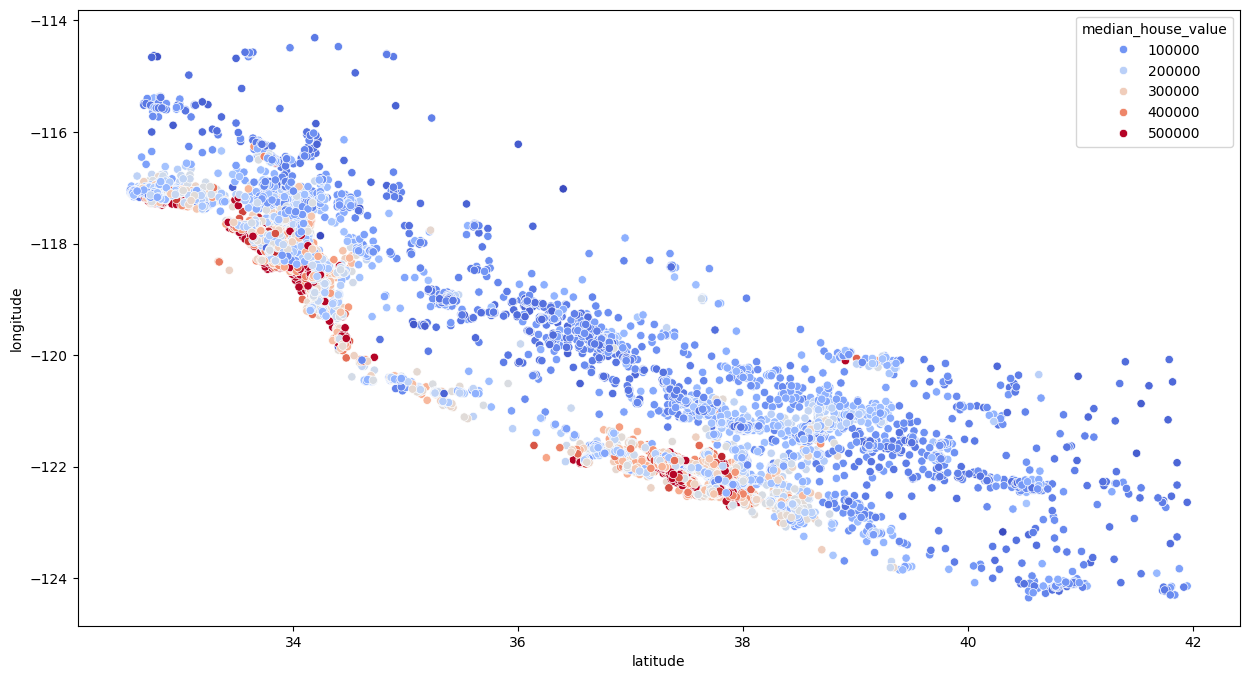

In [16]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude",y="longitude",data=train_data,hue="median_house_value",palette="coolwarm")


### 3. Engineered Factor 


Making a new input (feature) that we create manually or automatically from existing data to help our model perform better is called **Engineered Factor**.

In [17]:
train_data['bedroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

#feature eng

<Axes: >

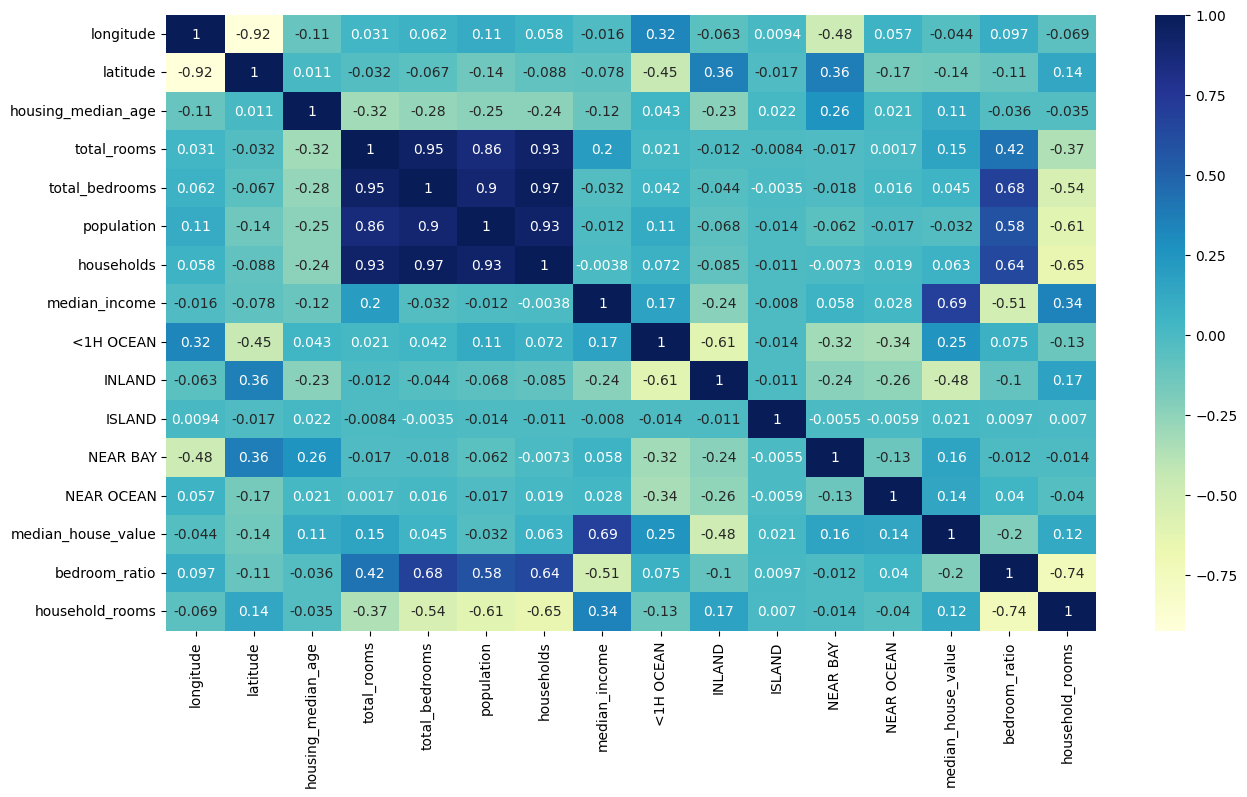

In [18]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.drop('ocean_proximity',axis=1).corr(), annot=True, cmap="YlGnBu")     #correlation

train multiple models

In [19]:
train_data.drop('ocean_proximity',axis=1)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,median_house_value,bedroom_ratio,household_rooms
16873,-122.41,37.60,26.0,7.921173,5.998937,7.029088,5.981414,6.3719,0,0,0,0,1,466900.0,0.757329,1.324298
10259,-117.85,33.86,18.0,5.799093,4.290459,5.347108,4.276666,4.6806,1,0,0,0,0,187500.0,0.739850,1.355984
15729,-122.44,37.78,16.0,6.784457,5.468060,6.400257,5.393628,2.1510,0,0,0,1,0,146900.0,0.805969,1.257865
3174,-119.78,36.37,41.0,6.723832,5.010635,6.095825,4.990433,3.1406,0,1,0,0,0,100000.0,0.745205,1.347345
7253,-118.14,34.01,36.0,6.555357,5.351858,6.727432,5.379897,2.2500,1,0,0,0,0,162500.0,0.816410,1.218491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15374,-117.25,33.39,22.0,7.901007,6.298949,7.262629,6.198479,2.3750,1,0,0,0,0,137300.0,0.797234,1.274669
8477,-118.31,33.92,35.0,7.176255,5.509388,6.511745,5.393628,4.8456,1,0,0,0,0,146400.0,0.767725,1.330506
16931,-122.31,37.57,42.0,8.057694,6.517671,7.380256,6.445720,3.7422,0,0,0,0,1,292600.0,0.808875,1.250084
9502,-123.54,39.17,18.0,7.719574,6.236370,6.940222,5.913503,2.2946,1,0,0,0,0,101000.0,0.807864,1.305415


### 4. Using Linear Regression

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

X_train,y_train=train_data.drop(['median_house_value','ocean_proximity'],axis=1),train_data['median_house_value']
X_train_scaled=scaler.fit_transform(X_train)

reg=LinearRegression()

reg.fit(X_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [21]:
test_data=X_test.join(y_test)

test_data['total_rooms']=np.log(test_data['total_rooms']+1)
test_data['total_bedrooms']=np.log(test_data['total_bedrooms']+1)
test_data['population']=np.log(test_data['population']+1)
test_data['households']=np.log(test_data['households']+1)

test_data=test_data.drop('ocean_proximity',axis=1)

test_data['bedroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']

In [22]:
X_test,y_test=test_data.drop('median_house_value',axis=1),test_data['median_house_value']

In [23]:
X_test_scaled=scaler.transform(X_test)

In [24]:
reg.score(X_test_scaled,y_test)

0.6772070845442806

### 5. Random Forest Regression


To improve the performance of our model , we use random forest regression

In [25]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
forest.score(X_test,y_test)

0.8159409578448675

In [ ]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()

param_grid={"n_estimators":[10,20,30],
    "max_features":[2,4,6,8]}

grid_search = GridSearchCV(forest,param_grid,cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)
grid_search.fit(X_train,y_train)

In [ ]:
best_forest=grid_search.best_estimator_

In [ ]:
best_forest.score(X_test,y_test)